In [1]:
# JM: 03 Feb
# code for energy balance

# load modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq

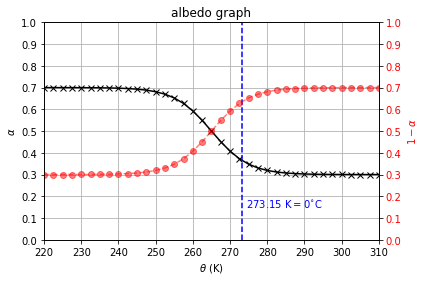

In [2]:
# 1) plot the tanh albedo

theta_min, theta_max = 220.0, 310.0
theta = np.arange(theta_min, theta_max + 1.0, 2.5)
mu, sig = 265.0, 10.0 # centre of transition zone and approx half-width of transition zone
alp = 0.5 - 0.2 * np.tanh( (theta - mu) / sig )
fig = plt.figure(figsize = (6, 4))
ax = plt.axes()
ax.plot(theta, alp, 'k-x')
# ax.plot([mu, mu], [0.0, 1.0], 'r--', alpha = 0.8)
ax.plot([273.15, 273.15], [0.0, 1.0], 'b--')
ax.text(273.15 + 1.0, 0.15, r"$273.15\ \mathrm{K} = 0^{\circ}\mathrm{C}$", color = "b")

ax.grid()
ax.set_xlabel(r"$\theta\ (\mathrm{K})$")
ax.set_ylabel(r"$\alpha$")
ax.set_ylim([0.0, 1.0])
ax.set_xlim([theta_min, theta_max])
ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.set_title(r"albedo graph")

ax2 = ax.twinx()
ax2.plot(theta, 1.0 - alp, 'r--o', alpha = 0.5)
ax2.set_ylabel(r"$1 - \alpha$", color = "r")
ax2.set_ylim([0.0, 1.0])
ax2.set_xlim([theta_min, theta_max])
ax2.set_yticks(np.arange(0.0, 1.1, 0.1));
ax2.tick_params(axis = "y", labelcolor = "r")

fig.savefig("../figures/tanh_albedo.png", dpi = 150)

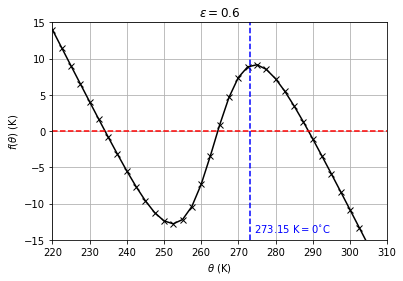

In [3]:
# 2) brute force plot the solution to the 0dEBM

Q, epsilon, sigma = 340.0, 0.6, 5.67e-8
theta_star = ( (1.0 - alp) * Q / (epsilon * sigma) ) ** (0.25)

fig = plt.figure(figsize = (6, 4))
ax = plt.axes()
ax.plot(theta, theta_star - theta, 'kx-')
ax.plot([theta_min, theta_max], [0.0, 0.0], 'r--')
ax.plot([273.15, 273.15], [-15.0, 15.0], 'b--')
ax.text(273.15 + 1.0, -14, r"$273.15\ \mathrm{K} = 0^{\circ}\mathrm{C}$", color = "b")

ax.grid()
ax.set_ylim([-15.0, 15.0])
ax.set_xlim([theta_min, theta_max])
ax.set_xlabel(r"$\theta\ (\mathrm{K})$")
ax.set_ylabel(r"$f(\theta)\ (\mathrm{K})$")

ax.set_title(r"$\epsilon = 0.6$")

fig.savefig("../figures/tanh_albedo_solu1.png", dpi = 150)

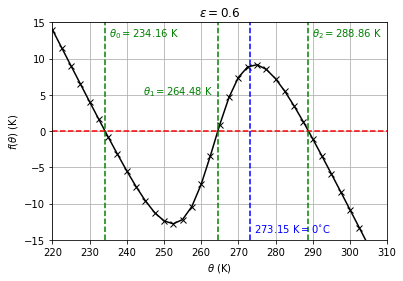

In [6]:
# 3) as above but do a dirty cheat solve to get the zeros

# define the functions to use the root finding algorithm
def alp_func(theta):
    return ( 0.5 - 0.2 * np.tanh( (theta - mu) / sig ) )

def f_func(theta):
    return ( ( (1.0 - alp_func(theta)) * Q / (epsilon * sigma) ) ** (0.25) - theta)

# just read off the range of where the zeros are
x0 = brentq(f_func, 200.0, 250.0)
x1 = brentq(f_func, 250.0, 270.0)
x2 = brentq(f_func, 280.0, 300.0)

fig = plt.figure(figsize = (6, 4))
ax = plt.axes()
ax.plot(theta, theta_star - theta, 'kx-')
ax.plot([theta_min, theta_max], [0.0, 0.0], 'r--')
ax.plot([273.15, 273.15], [-15.0, 15.0], 'b--')
ax.text(273.15 + 1.0, -14, r"$273.15\ \mathrm{K} = 0^{\circ}\mathrm{C}$", color = "b")
ax.plot([x0, x0], [-15.0, 15.0], 'g--')
ax.text(x0 + 1.0, 13, r"$\theta_0 = %.2f\ \mathrm{K}$" % x0, color = "g")
ax.plot([x1, x1], [-15.0, 15.0], 'g--')
ax.text(x1 - 20.0, 5, r"$\theta_1 = %.2f\ \mathrm{K}$" % x1, color = "g")
ax.plot([x2, x2], [-15.0, 15.0], 'g--')
ax.text(x2 + 1.0, 13, r"$\theta_2 = %.2f\ \mathrm{K}$" % x2, color = "g")

ax.grid()
ax.set_ylim([-15.0, 15.0])
ax.set_xlim([theta_min, theta_max])
ax.set_xlabel(r"$\theta\ (\mathrm{K})$")
ax.set_ylabel(r"$f(\theta)\ (\mathrm{K})$")

ax.set_title(r"$\epsilon = 0.6$")

fig.savefig("../figures/tanh_albedo_solu2.png", dpi = 150)

In [126]:
288.86 - 273.15

15.710000000000036